# Import open-source SFrame package instead of full commercial GraphLab

In [1]:
import sframe

# Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = sframe.SFrame('home_data.gl/')

2016-04-12 00:31:28,528 [INFO] sframe.cython.cy_server, 172: SFrame v1.8.5 started. Logging /tmp/sframe_server_1460435488.log


In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/toddleonhardt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


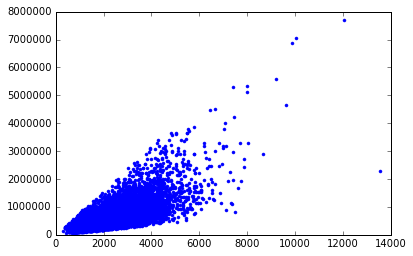

In [8]:
plt.plot(sales['sqft_living'], sales['price'], '.')

# Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [9]:
train_data,test_data = sales.random_split(.8,seed=0)

## Build the regression model using only sqft_living as a feature

In [15]:
from sklearn import linear_model

In [49]:
# Create linear regression object using Ridge Regression (regularization)
sqft_model = linear_model.Ridge(alpha=0.01)

# Train the model using the training set and only one feature
sqft_model.fit(train_data['sqft_living'].to_numpy().reshape(-1,1), train_data['price'])

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

# Evaluate the simple model

In [50]:
print test_data['price'].mean()

543054.042563


In [51]:
import numpy as np

In [52]:
# The error in prediction
err = sqft_model.predict(test_data['sqft_living'].to_numpy().reshape(-1,1)) - test_data['price']

# Max error
max_error = max(abs(err))

# The Mean Square Error (MSE)
mse = np.mean(err**2)

# The Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)

print('max_error: {},  rmse: {}'.format(max_error, rmse))

max_error: 4143543.16314,  rmse: 255191.051


RMSE of about \$255,191!

# Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

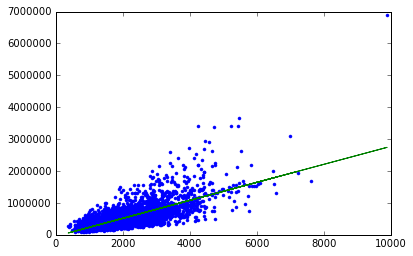

In [53]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data['sqft_living'].to_numpy().reshape(-1,1)),'-')

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [54]:
print('Intercept: {}   Coefficients: {}'.format(sqft_model.intercept_, sqft_model.coef_))

Intercept: -47116.0765745   Coefficients: [ 281.95883857]


# Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [55]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [56]:
sales[my_features].to_dataframe().describe()

,sqft_living,sqft_lot
count,21613.000000,2.161300e+04
mean,2079.899736,1.510697e+04
std,918.440897,4.142051e+04
min,290.000000,5.200000e+02
25%,1427.000000,5.040000e+03
50%,1910.000000,7.618000e+03
75%,2550.000000,1.068800e+04
max,13540.000000,1.651359e+06


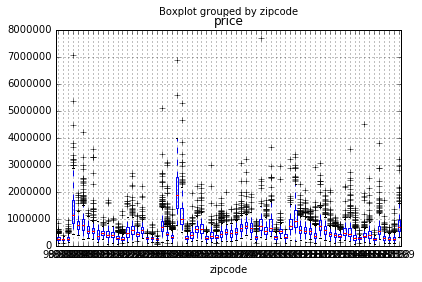

In [40]:
sales.to_dataframe().boxplot(column='price', by='zipcode')

98039 is the most expensive zip code.

# Build a regression model with more features

In [60]:
my_features_model = linear_model.Ridge(alpha=1)
my_features_model.fit(train_data[my_features].to_dataframe(), train_data['price'])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [61]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


## Comparing the results of the simple model with adding more features

In [62]:
# The error in prediction
err_sqft = sqft_model.predict(test_data['sqft_living'].to_numpy().reshape(-1,1)) - test_data['price']
err_my = my_features_model.predict(test_data[my_features].to_dataframe()) - test_data['price']

# The maximum error
max_error_sqft = max(abs(err_sqft))
max_error_my = max(abs(err_my))

# The Root Mean Square Error (RMSE)
rmse_sqft = np.sqrt(np.mean(err_sqft**2))
rmse_my = np.sqrt(np.mean(err_my**2))

print("sqft_model:  max_error = {}  rmse = {}".format(max_error_sqft, rmse_sqft))
print("my_features_model:  max_error = {}  rmse = {}".format(max_error_my, rmse_my))

sqft_model:  max_error = 4143543.16314  rmse = 255191.051
my_features_model:  max_error = 3962303.30116  rmse = 251490.84219


The RMSE goes down from \$255,191 to \$179,542 with more features.

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [18]:
house1 = sales[sales['id']=='5309101200']

In [19]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [20]:
print house1['price']

[620000, ... ]


In [21]:
print sqft_model.predict(house1)

[629584.8197281547]


In [22]:
print my_features_model.predict(house1)

[721918.9333272816]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

## Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [23]:
house2 = sales[sales['id']=='1925069082']

In [24]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [25]:
print sqft_model.predict(house2)

[1261170.4040999692]


In [26]:
print my_features_model.predict(house2)

[1446472.4690774996]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

## Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [27]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [28]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

[13749825.525717655]


The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)

# Assignment


## Selection and summary statistics for most expensive zipcode

In [29]:
expensive_neighborhood = sales[sales['zipcode']=='98039']

In [30]:
expensive_neighborhood['price'].mean()

2160606.5999999996

## Filtering Data

### Use logical filters to select rows of an SFrame. 
Select houses that have 'sqft_living' higher than 2000 sqft but no larger than 4000 sft.  
Then compute what fraction of all houses have 'sqft_living' in this range.

In [32]:
midrange_sqft = sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] <= 4000)]

In [37]:
len(midrange_sqft)

9118

In [38]:
len(sales)

21613

In [39]:
len(midrange_sqft) / float(len(sales))

0.42187572294452413

## Building a regression model with several more features

In [51]:
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition',     # condition of house
'grade',         # measure of quality of construction
'waterfront',    # waterfront property
'view',          # type of view
'sqft_above',    # square feet above ground
'sqft_basement', # square feet in basement
'yr_built',      # the year built
'yr_renovated',  # the year renovated
'lat', 'long',   # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors
'sqft_lot15',    # average lot size of 15 nearest neighbors 
]
advanced_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'zipcode',
 'condition',
 'grade',
 'waterfront',
 'view',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [43]:
advanced_model = graphlab.linear_regression.create(train_data,target='price',features=advanced_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.032155     | 3469012.450663     | 154580.940735 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [44]:
print my_features_model.evaluate(test_data)
print advanced_model.evaluate(test_data)

{'max_error': 3486584.509381928, 'rmse': 179542.43331269105}
{'max_error': 3556849.413848093, 'rmse': 156831.11680191013}


In [50]:
rmse_improvement = my_features_model.evaluate(test_data)['rmse'] - advanced_model.evaluate(test_data)['rmse']
rmse_improvement

22711.316510780918